# Overview
In this notebook, we explore the process of training a Deep Convolutional Generative Adversarial Network (DCGAN) on a dataset of Impressionist artworks to generate new, creative pieces. The DCGAN architecture, introduced by Radford, Metz, and Chintala, is well-suited for image generation tasks and involves simultaneously training two neural networks (the generator and the discriminator) in an adversarial framework to produce realistic outputs.

### Visualising the dataset

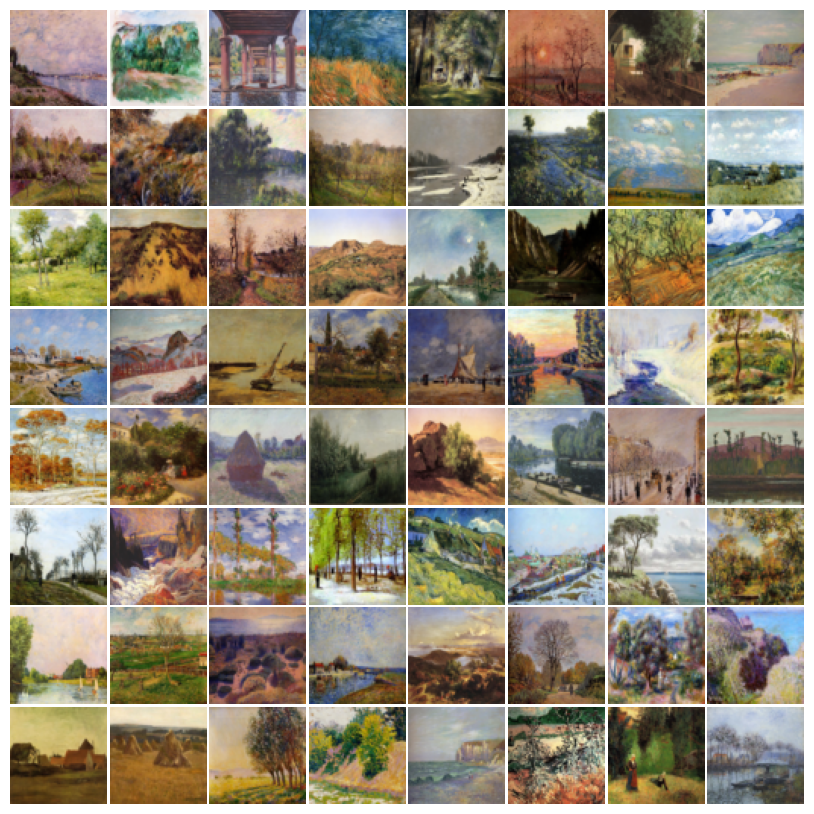

In [1]:
from src.data_utils import prepare_dataloaders
from src.vis_utils import visualise_dataset
dataset, dataloader = prepare_dataloaders(
        data_dir='F:\deep-learning\datasets\impressionist_landscapes', 
        batch_size=64, 
        num_workers=0, 
        dataset_type='full'
    )
visualise_dataset(dataset, 'images')

### Training and Evaluation of DCGAN model
We train the DCGAN on our dataset of Impressionist artworks for 150 epochs. As training progresses, we track the Generator and Discriminator losses to monitor the model's performance over time. Additionally, we periodically generate sample images using fixed noise to visually inspect the quality of the generated artworks across different epochs. By visually inspecting the generated images, we can determine the optimal number of epochs to train the model and therefore select the appropriate model checkpoint to use for generating new images.

In [40]:
#############################################################################
# Training for 150 epochs
#############################################################################
!python main.py --mode train --num_workers 0 --num_epochs 150 --model_name gl-epoch150 

Epoch 1 | Loss_D = 1.2618 | Loss_G = 12.5156 | D_x = 0.9311 | D_G_z1 = 0.5858 | D_G_z2 = 0.0000 | Time taken: 59.18 seconds
Epoch 2 | Loss_D = 0.5903 | Loss_G = 5.5121 | D_x = 0.7149 | D_G_z1 = 0.1794 | D_G_z2 = 0.0054 | Time taken: 53.47 seconds
Epoch 3 | Loss_D = 0.8734 | Loss_G = 13.3334 | D_x = 0.8369 | D_G_z1 = 0.4805 | D_G_z2 = 0.0000 | Time taken: 53.88 seconds
Epoch 4 | Loss_D = 1.6908 | Loss_G = 0.2659 | D_x = 0.2311 | D_G_z1 = 0.0147 | D_G_z2 = 0.8047 | Time taken: 53.91 seconds
Epoch 5 | Loss_D = 0.8851 | Loss_G = 2.7755 | D_x = 0.7233 | D_G_z1 = 0.3444 | D_G_z2 = 0.0882 | Time taken: 53.97 seconds
Epoch 6 | Loss_D = 0.2991 | Loss_G = 3.4016 | D_x = 0.8248 | D_G_z1 = 0.0868 | D_G_z2 = 0.0388 | Time taken: 53.92 seconds
Epoch 7 | Loss_D = 0.7132 | Loss_G = 3.9470 | D_x = 0.6975 | D_G_z1 = 0.2026 | D_G_z2 = 0.0583 | Time taken: 53.46 seconds
Epoch 8 | Loss_D = 1.5092 | Loss_G = 5.2009 | D_x = 0.5425 | D_G_z1 = 0.4410 | D_G_z2 = 0.0073 | Time taken: 53.42 seconds
Epoch 9 | Loss

E:\Users\Gordon\Coding Projects\Github\deep-learning\impress-gan\src\vis_utils.py:84: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`). Consider using `matplotlib.pyplot.close()`.
  plt.figure(figsize=(8, 8))


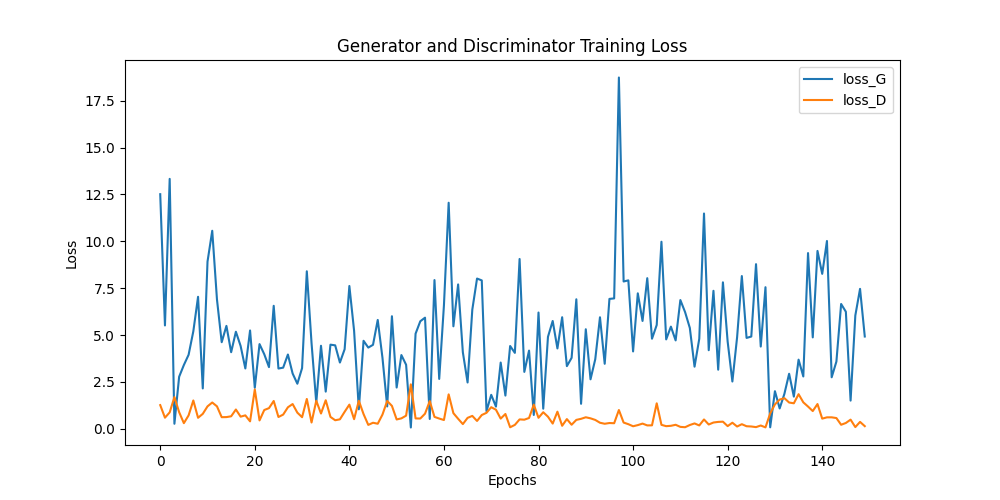

In [5]:
from IPython.display import Image

# Loss vs Epoch chart
Image(filename='results/gl-epoch150/plot_loss_vs_epoch.png') 


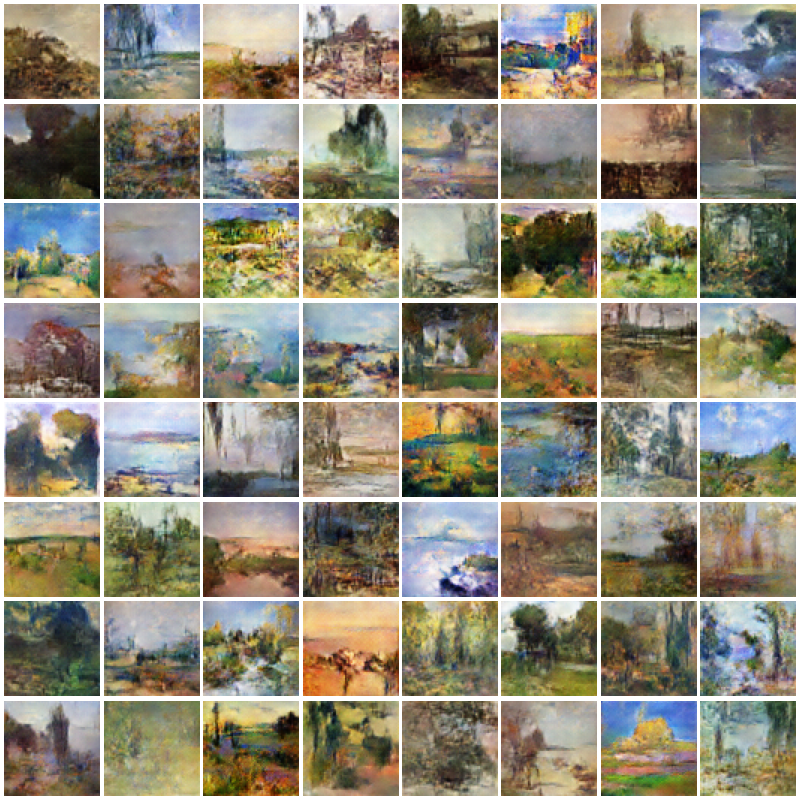

In [6]:
# Generated images at epoch 130 (with fixed noise)
Image(filename='images/gl-epoch150/dcgan_output_epoch_130.png') 

### Image Generation
After manually inspecting the generated images, and noting the existence of local minima in Generator loss, we determined that training the DCGAN model for 130 epochs produces the highest-quality images. 

We load this trained model from the saved checkpoint and use it to create new artworks by feeding random noise into the network and visualising the generated images. These images showcase how well the DCGAN has learned to replicate the style and characteristics of the Impressionist artworks in the dataset.

Our generated images are relatively low resolution, and a significant proportion of them show errors that suggest they are artificially generated. However, many of the images are promising, effectively capturing key elements of Impressionist artwork, and some might not even look out of place in an Impressionist gallery (if appropriately upscaled).

In [2]:
#############################################################################
# Test: gl-epoch150 (using checkpoint at epoch 130 - determined through manual inspection of generated images and existence of a local minimum for generator loss)
#############################################################################
!python main.py --mode test --model_name gl-epoch150-test --checkpoint_path checkpoint/gl-epoch150/checkpoint_epoch_130.pth.tar

Figure(800x800)


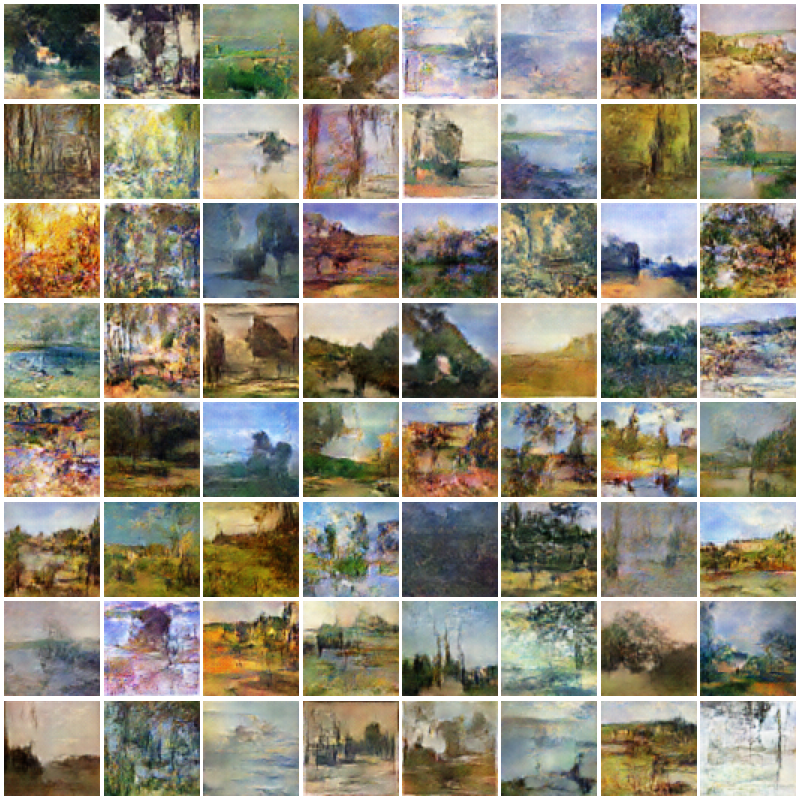

In [8]:
# Generated images at epoch 130 (with random noise at test-time)
Image(filename='images/gl-epoch150-test/dcgan_generated_images.png') 

### Further Improvements
There are several areas we can explore for improvement in the future:
- **Increase Image Resolution**: Currently, our generated images are of low resolution (64x64). We can explore training on higher resolution images to generate higher resolution outputs. This will require adjusting the architecture to allow for larger image sizes and higher computation cost.
- **Advanced Training Techniques**: To improve stability during training and improve the quality of our generated images, we can experiment with techniques from the paper Improved Techniques for Training GANs by Salimans et al. (2016). This includes techniques such as feature matching, minibatch discrimination, historical averaging, one-sided label smoothing, and virtual batch normalisation.
- **Experiment with Different Architectures**: Experimenting with different architectures may also improve performance and allow us to generate higher-quality images.
- **Evaluation Metrics**: Incoporating metrics like Fréchet Inception Distance (FID) or Inception Score can help us quantitatively evaluate the quality of the generated images and provide more insight into model performance. It can help us better judge between models that produce visually similar or difficult-to-compare outputs.